# Análise Multivariada e Aprendizado Não-Supervisionado

por Cibele Russo.

ICMC USP São Carlos.


## Aula 12b: Análise de Correspondência


In [ ]:
#!pip install --user prince

Fontes: 

- https://codefying.com/2018/12/21/introduction-to-correspondence-analysis/
- https://pypi.org/project/prince/#correspondence-analysis-ca

Análise textual onde trechos de alguns autores são analisados pela frequência das letras. Os cinco autores e as letras são mostrados abaixo:

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import prince
import pandas as pd
import numpy as np

In [2]:
authors = ["Charles Darwin", "Rene Descartes","Thomas Hobbes", "Mary Shelley", "Mark Twain"]
initials=['CD1','CD2','CD3','RD1','RD2','RD3','TB1','TB2','TB3','MS1','MS2','MS3','MT1','MT2','MT3']
chars=["B", "C", "D", "F", "G", "H", "I", "L", "M", "N","P", "R", "S", "U", "W", "Y"]

In [3]:
sampleCrosstab=[[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]

In [4]:
data = pd.DataFrame(sampleCrosstab)
data.columns = chars
data.index = initials
data

,B,C,D,F,G,H,I,L,M,N,P,R,S,U,W,Y
CD1,34,37,44,27,19,39,74,44,27,61,12,65,69,22,14,21
CD2,18,33,47,24,14,38,66,41,36,72,15,62,63,31,12,18
CD3,32,43,36,12,21,51,75,33,23,60,24,68,85,18,13,14
RD1,13,31,55,29,15,62,74,43,28,73,8,59,54,32,19,20
RD2,8,28,34,24,17,68,75,34,25,70,16,56,72,31,14,11
RD3,9,34,43,25,18,68,84,25,32,76,14,69,64,27,11,18
TB1,15,20,28,18,19,65,82,34,29,89,11,47,74,18,22,17
TB2,18,14,40,25,21,60,70,15,37,80,15,65,68,21,25,9
TB3,19,18,41,26,19,58,64,18,38,78,15,65,72,20,20,11
MS1,13,29,49,31,16,61,73,36,29,69,13,63,58,18,20,25


In [5]:
grandTotal = np.sum(sampleCrosstab)
correspondenceMatrix = np.divide(sampleCrosstab,grandTotal)

rowTotals = np.sum(correspondenceMatrix, axis=1)
columnTotals = np.sum(correspondenceMatrix, axis=0)
 
independenceModel = np.outer(rowTotals, columnTotals)
 
#Calculate manually
chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
print(chiSquaredStatistic)
 
# Quick check - compare to scipy Chi-Squared test
statistic, prob, dof, ex = chi2_contingency(data)
print(statistic)
print(np.round(prob, decimals=2))

448.49666422103445
448.49666422103445
0.0


In [6]:
# pre-calculate normalised rows
norm_correspondenceMatrix = np.divide(correspondenceMatrix,rowTotals[:, None])
 
chiSquaredDistances = np.zeros((correspondenceMatrix.shape[0],correspondenceMatrix.shape[0]))
 
norm_columnTotals = np.sum(norm_correspondenceMatrix, axis=0)
for row in range(correspondenceMatrix.shape[0]):
    chiSquaredDistances[row]=np.sqrt(np.sum(np.square(norm_correspondenceMatrix
                                                        -norm_correspondenceMatrix[row])/columnTotals, axis=1))
# Save distances to the DataFrame
dfchiSquaredDistances = pd.DataFrame(data=np.round(chiSquaredDistances*100).astype(int))
 


In [7]:
standardizedResiduals = np.divide((correspondenceMatrix-independenceModel),np.sqrt(independenceModel))
 
u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

In [8]:
deltaR = np.diag(np.divide(1.0,np.sqrt(rowTotals)))
 
rowScores=np.dot(np.dot(deltaR,u),np.diag(s))
 
dfFirstTwoComponents = pd.DataFrame(data=[l[0:2] for l in rowScores], columns=['X', 'Y'], index=initials)
 
print(dfFirstTwoComponents)

            X         Y
CD1 -0.070977  0.200620
CD2 -0.062109  0.094512
CD3 -0.148509  0.158889
RD1  0.030697  0.019028
RD2 -0.069552 -0.068382
RD3 -0.115119 -0.063805
TB1 -0.006890 -0.103594
TB2 -0.053382 -0.170423
TB3 -0.083822 -0.121758
MS1 -0.016408  0.001383
MS2 -0.143838 -0.010875
MS3 -0.029819  0.005454
MT1  0.256214 -0.009194
MT2  0.243356  0.059730
MT3  0.265072 -0.006179


In [14]:
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42)

data.columns.rename('chars', inplace=True)
data.index.rename('initials', inplace=True)

ca = ca.fit(data)

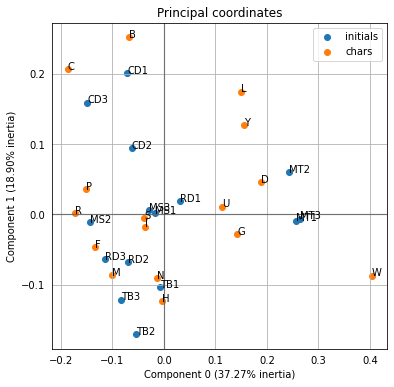

In [15]:
ca.plot_coordinates(data);